<a href="https://colab.research.google.com/github/kengo6122024/HelloGit/blob/main/gyro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#ピーク検出
from scipy import signal
from scipy.signal import argrelmin, argrelmax

#補完
from scipy.interpolate import interp1d


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/intern/20240202_080807.csv', header = 4)
df['合成加速度'] = np.sqrt(df['加速度X']**2 + df['加速度Y']**2 + df['加速度Z']**2) #合成加速度の列を追加

# 6000行ごとに分割
chunks = [df.iloc[i:i + 6000] for i in range(0, df.shape[0], 6000)]

# 分割されたデータフレームの例
print(f"Total chunks created: {len(chunks)}")  # 作成されたチャンクの総数を表示
display(chunks[0],chunks[192],df)  # 最初,最後のチャンクと全体を表示

Total chunks created: 321


,カウンター,加速度X,加速度Y,加速度Z,角速度X,角速度Y,角速度Z,合成加速度
0,0,4.094085,2.049437,8.547300,0.915527,3.234863,3.662109,9.696291
1,1,4.094085,1.982399,8.561666,0.427246,1.892090,4.272461,9.695028
2,2,4.113238,1.896208,8.518570,1.159668,1.892090,4.028320,9.647817
3,3,4.098873,1.829170,8.499416,1.953125,1.892090,3.356934,9.611800
4,4,4.156334,1.891419,8.432379,2.990723,2.685547,2.685547,9.589452
...,...,...,...,...,...,...,...,...
5995,5995,1.628057,-5.339070,8.073248,-1.037598,0.305176,7.690430,9.814967
5996,5996,1.618480,-5.377377,8.025364,-1.220703,-0.061035,7.568359,9.795005
5997,5997,1.613692,-5.410896,8.015787,-1.159668,-0.305176,7.507324,9.804827
5998,5998,1.661576,-5.401319,8.015787,-1.220703,-0.610352,7.263184,9.807544


,カウンター,加速度X,加速度Y,加速度Z,角速度X,角速度Y,角速度Z,合成加速度
1152000,-27648,-0.780510,-13.484144,9.390059,-49.011230,55.969240,-115.722660,16.450062
1152001,-27647,-2.164358,-11.880029,8.192958,-18.249512,45.043945,-104.919430,14.592604
1152002,-27646,-1.805228,-9.624691,7.015011,-12.451172,41.992188,-99.914550,12.045908
1152003,-27645,-1.307234,-7.647080,6.004658,23.864746,30.334473,-93.383790,9.810332
1152004,-27644,-1.182736,-6.181829,5.147533,59.509277,15.625000,-86.303710,8.130865
...,...,...,...,...,...,...,...,...
1157995,-21653,0.014365,1.666364,1.580173,-13.427734,-34.240723,59.265137,2.296502
1157996,-21652,0.679953,2.073379,0.708684,-4.272461,-40.588380,48.645020,2.294225
1157997,-21651,1.379060,1.321599,0.454898,-4.577637,-37.841797,33.691406,1.963508
1157998,-21650,1.929727,-0.507571,-0.411803,-8.972168,-26.916504,22.644043,2.037414


,カウンター,加速度X,加速度Y,加速度Z,角速度X,角速度Y,角速度Z,合成加速度
0,0,4.094085,2.049437,8.547300,0.915527,3.234863,3.662109,9.696291
1,1,4.094085,1.982399,8.561666,0.427246,1.892090,4.272461,9.695028
2,2,4.113238,1.896208,8.518570,1.159668,1.892090,4.028320,9.647817
3,3,4.098873,1.829170,8.499416,1.953125,1.892090,3.356934,9.611800
4,4,4.156334,1.891419,8.432379,2.990723,2.685547,2.685547,9.589452
...,...,...,...,...,...,...,...,...
1924546,24002,0.009577,0.052672,9.768343,-0.244141,0.427246,0.366211,9.768490
1924547,24003,0.004788,0.038307,9.763555,-0.183105,0.427246,0.305176,9.763631
1924548,24004,0.009577,0.062249,9.792285,-0.244141,0.305176,0.305176,9.792488
1924549,24005,0.009577,0.076614,9.777920,-0.244141,0.427246,0.427246,9.778225


In [ ]:
pitches = []
foot_contact_index = []
for i in range(len(chunks)):
    int_acc = chunks[i]["合成加速度"].to_numpy()
    maxid = signal.argrelmax(int_acc, order=20) #着足を検出
    foot_contact_index.append(maxid[0]) #着足時刻のリストをリストに格納
    threshold = 16  #閾値（おおよそ重力加速度の２乗）
    count = 0
    for time in maxid[0]:
        if int_acc[time] > threshold :
            count += 1
    pitches.append(count)

print(pitches)
print(len(foot_contact_index))
print(len(pitches))

[24, 10, 2, 43, 23, 44, 176, 42, 135, 85, 177, 134, 136, 0, 62, 67, 108, 73, 104, 0, 152, 160, 167, 177, 178, 98, 178, 139, 178, 172, 177, 177, 177, 178, 177, 177, 176, 175, 176, 176, 176, 39, 126, 177, 176, 177, 137, 56, 178, 94, 163, 40, 36, 179, 178, 178, 178, 177, 178, 177, 177, 177, 177, 115, 177, 178, 178, 177, 176, 113, 33, 177, 176, 176, 175, 175, 175, 160, 177, 177, 176, 175, 174, 176, 176, 175, 153, 175, 176, 176, 143, 176, 176, 175, 176, 6, 1, 1, 41, 151, 159, 177, 177, 176, 175, 156, 161, 7, 6, 140, 127, 176, 163, 176, 176, 177, 169, 176, 169, 163, 174, 174, 175, 175, 175, 175, 175, 153, 122, 176, 175, 176, 175, 175, 174, 173, 175, 174, 175, 95, 30, 0, 0, 0, 0, 0, 0, 0, 0, 115, 175, 176, 176, 175, 175, 175, 176, 175, 174, 165, 175, 173, 174, 175, 174, 174, 175, 175, 175, 174, 133, 174, 175, 174, 174, 176, 174, 175, 175, 174, 175, 174, 111, 175, 147, 176, 174, 173, 174, 175, 176, 175, 175, 175, 175, 155, 174, 91, 88, 99, 175, 175, 175, 175, 175, 173, 174, 176, 173, 174, 175,

In [ ]:
running_pitches = [pitch for pitch in pitches if pitch > 100] #pitchが100を超えた場合のみ走っているとみなし、ランニング時のピッチを計算する。
running_time = [ time for time in range(len(pitches)) if pitches[time] > 100 ]
walking_time = [ time for time in range(len(pitches)) if pitches[time] < 100 ]

len(running_time),len(walking_time)

(257, 64)

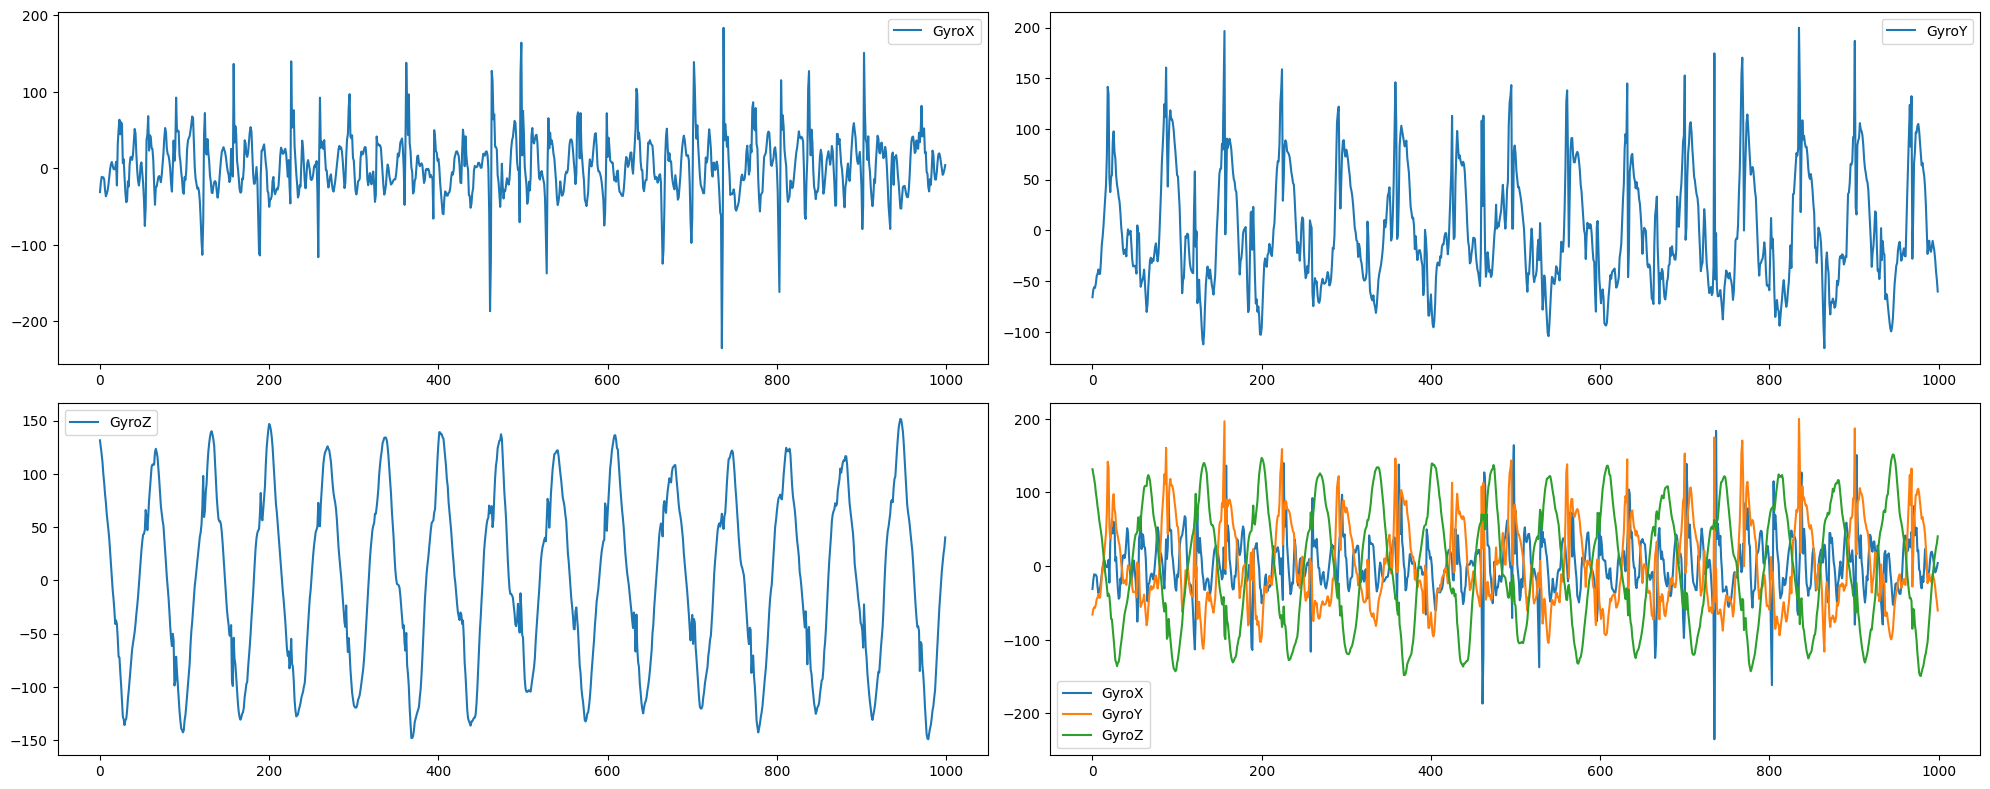

In [ ]:
wx = chunks[90]['角速度X'][1000:2000].to_numpy()
wy = chunks[90]['角速度Y'][1000:2000].to_numpy()
wz = chunks[90]['角速度Z'][1000:2000].to_numpy()

plt.figure(figsize=(20, 8))  # グラフのサイズを指定

plt.subplot(2,2,1)
plt.plot(wx, label ='GyroX')
plt.legend()

plt.subplot(2,2,2)
plt.plot(wy, label ='GyroY')
plt.legend()

plt.subplot(2,2,3)
plt.plot(wz, label ='GyroZ')
plt.legend()

plt.subplot(2,2,4)
plt.plot(wx, label ='GyroX')
plt.plot(wy, label ='GyroY')
plt.plot(wz, label ='GyroZ')
plt.legend()

plt.tight_layout()

plt.show()

In [ ]:
wx_mean = np.mean(wx)
wy_mean = np.mean(wy)
wz_mean = np.mean(wz)

print(f'wxの平均値:{wx_mean},wyの平均値:{wy_mean},wzの平均値:{wz_mean}')

wxの平均値:2.54992679152,wyの平均値:0.70031741307,wzの平均値:-0.7273559635000001


In [ ]:
print(1/wx_mean,1/wy_mean)

0.39216812158121 1.4279239403976456


In [ ]:
wx_std = np.std(wx)
wy_std = np.std(wy)
wz_std = np.std(wz)

print(wx_std,wy_std,wz_std)

38.117442014078584 57.674797243291025 82.34284421794901


In [ ]:
wx_means = []
wy_means = []
wz_means = []

for time in running_time :
    wx = chunks[time]['角速度X'].to_numpy()
    wy = chunks[time]['角速度Y'].to_numpy()
    wz = chunks[time]['角速度Z'].to_numpy()

    wx_mean = np.mean(wx)
    wy_mean = np.mean(wy)
    wz_mean = np.mean(wz)

    wx_means.append(wx_mean)
    wy_means.append(wy_mean)
    wz_means.append(wz_mean)

print(wx_means)


[2.427347821784, 1.7333679236579997, 2.5214131657593333, 1.8338623016316666, 1.8032735108063334, 1.3612670905483333, 1.5832417726333332, 2.2376505521876666, 2.4967956622003338, 2.6817118404836666, 2.94794718185, 2.321055079456667, 2.6830139011460004, 1.8539021861319998, 2.531636580825, 2.1774902293046665, 2.1353353083046667, 1.9428507345980004, 2.2784728901623335, 2.613240556575, 2.2744954466773333, 2.513498947934, 1.9205830991479997, 2.1305440300636667, 2.3807678178696667, 2.424285894558667, 2.1115722803343333, 1.362009692768, 2.074279792444, 1.5455119009566667, 2.222666426942667, 1.6281331311046667, 2.7964579399706664, 1.723592125036, 2.3630269414913334, 2.7440287342236673, 2.833475766662667, 2.993509928487333, 2.3567606549050004, 2.489857988647333, 2.345296225069, 2.4899088551293334, 2.0083414685746668, 2.1335245768903337, 1.251047772764, 1.7393086701316667, 2.166809085314, 1.9475301177106668, 2.6377868872690002, 3.1343993997329997, 1.6237386115763335, 2.4984639533153334, 2.10392253

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/li

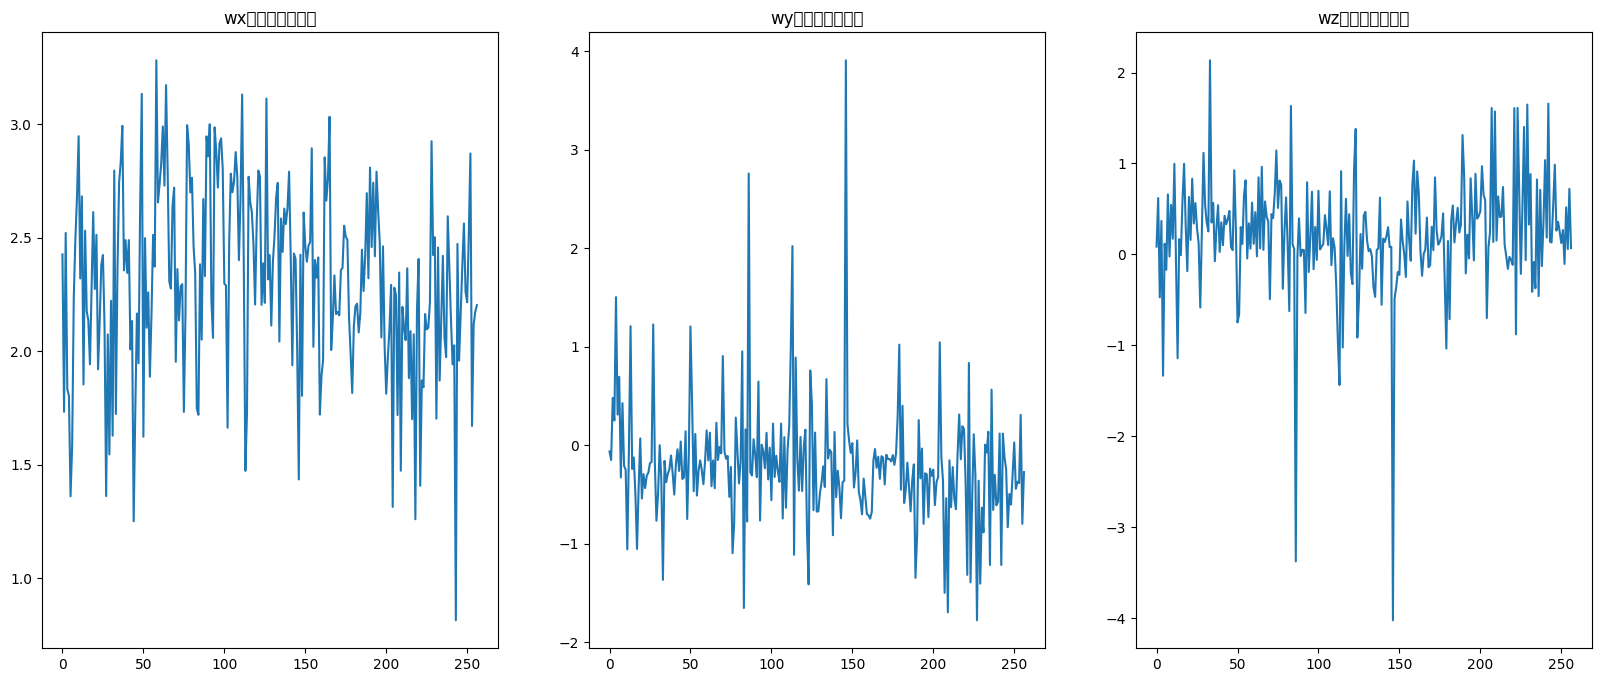

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1,3,1)
plt.plot(wx_means)
plt.title('wxの平均値の推移')

plt.subplot(1,3,2)
plt.plot(wy_means)
plt.title('wyの平均値の推移')

plt.subplot(1,3,3)
plt.plot(wz_means)
plt.title('wzの平均値の推移')

plt.show()

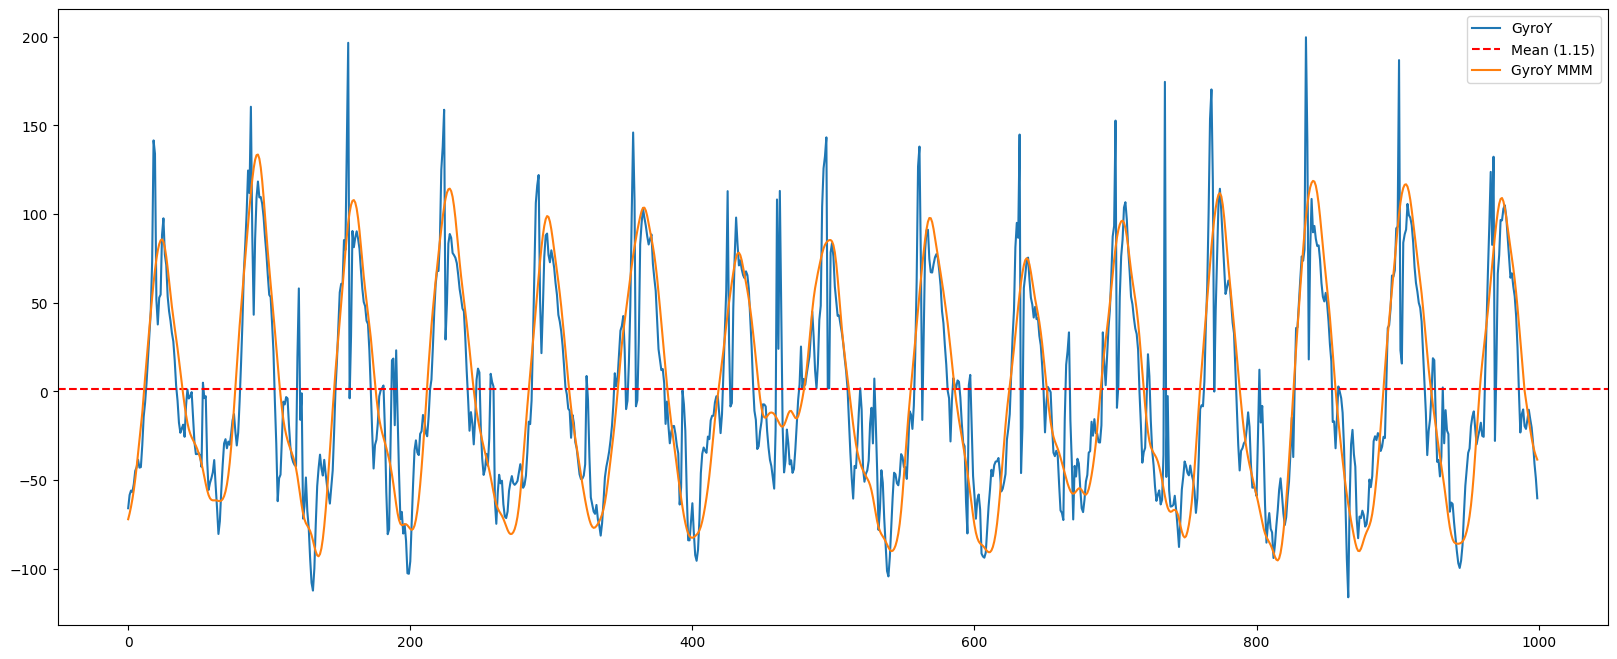

In [ ]:
def LPF_MAM(x,tau = 0.01):
    k = np.round(tau).astype(int)
    x_mean =  np.zeros(x.shape)
    N = x.shape[0]
    for i in range(N):
        if  i-k//2 <0 :
            x_mean[i]  = x[: i - k//2 +k].mean()
        elif i - k//2 +k>=N:
            x_mean[i]  = x[i - k//2 :].mean()
        else :
            x_mean[i]  = x[i - k//2 : i - k//2 +k].mean()
    return x_mean

tau1 =5
tau2 =20
wy_MAM = LPF_MAM(wy,tau1)
wy_MM = LPF_MAM(wy_MAM,tau1)
wy_MMM = 1.5*LPF_MAM(wy_MM,tau2)

plt.figure(figsize=(20, 8))  # グラフのサイズを指定
plt.plot(wy, label ='GyroY')
#plt.plot(wy_MAM, label ='GyroY MAM')
#plt.plot(wy_MM, label ='GyroY MM')
mean_value = np.mean(wy_MMM)#平均値を表示
plt.axhline(y=mean_value, color='red', linestyle='--', label=f'Mean ({mean_value:.2f})')#平均値を表示
plt.plot(wy_MMM, label ='GyroY MMM')
plt.legend()
plt.show()

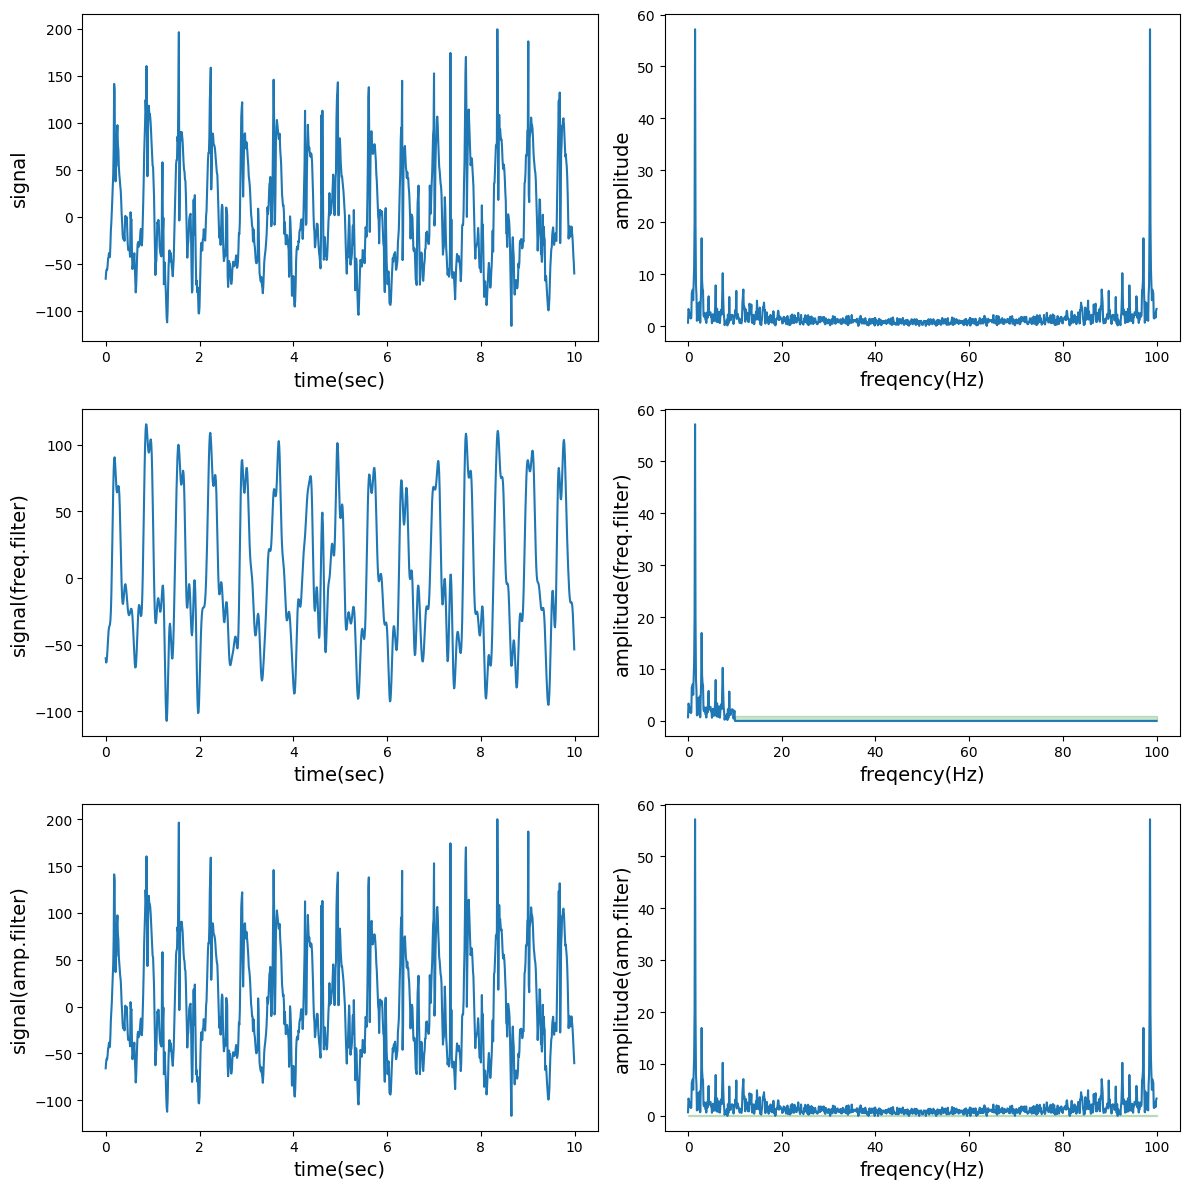

In [ ]:
# 簡単な信号の作成(正弦波 + ノイズ)
N = len(wy)
dt = 0.01 # サンプリング周期(sec)
freq = 4 # 周波数(Hz)
amp = 1 # 振幅

t = np.arange(0, N*dt, dt) # 時間軸
f = wy # 信号

# 高速フーリエ変換(FFT)
F = np.fft.fft(f)
F_abs = np.abs(F) # 複素数を絶対値に変換
F_abs_amp = F_abs / N * 2 # 振幅をもとの信号に揃える(交流成分2倍)
F_abs_amp[0] = F_abs_amp[0] / 2 # 振幅をもとの信号に揃える(直流成分非2倍)

# 周波数軸のデータ作成
fq = np.linspace(0, 1.0/dt, N) # 周波数軸　linspace(開始,終了,分割数)

# フィルタリング①（周波数でカット）＊＊＊＊＊＊
F2 = np.copy(F) # FFT結果コピー
fc = 10 # カットオフ（周波数）
F2[(fq > fc)] = 0 # カットオフを超える周波数のデータをゼロにする（ノイズ除去）
F2_abs = np.abs(F2) # FFTの複素数結果を絶対値に変換
F2_abs_amp = F2_abs / N * 2 # 振幅をもとの信号に揃える(交流成分2倍)
F2_abs_amp[0] = F2_abs_amp[0] / 2 # 振幅をもとの信号に揃える(直流成分非2倍)
F2_ifft = np.fft.ifft(F2) # IFFT
F2_ifft_real = F2_ifft.real * 2 # 実数部の取得、振幅を元スケールに戻す

# フィルタリング②（振幅強度でカット）＊＊＊＊＊＊
F3 = np.copy(F) # FFT結果コピー
ac = 0.2 # 振幅強度の閾値
F3[(F_abs_amp < ac)] = 0 # 振幅が閾値未満はゼロにする（ノイズ除去）
F3_abs = np.abs(F3)# 複素数を絶対値に変換
F3_abs_amp = F3_abs / N * 2 # 交流成分はデータ数で割って2倍
F3_abs_amp[0] = F3_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要
F3_ifft = np.fft.ifft(F3) # IFFT
F3_ifft_real = F3_ifft.real # 実数部の取得

# グラフ表示
fig = plt.figure(figsize=(12, 12))

# グラフ表示
# オリジナル信号
fig.add_subplot(321)
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('signal', fontsize=14)
plt.plot(t, f)

# オリジナル信号 ->FFT
fig.add_subplot(322)
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.plot(fq, F_abs_amp)

# オリジナル信号 ->FFT ->周波数filter ->IFFT
fig.add_subplot(323)
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('signal(freq.filter)', fontsize=14)
plt.plot(t, F2_ifft_real)

# オリジナル信号 ->FFT ->周波数filter
fig.add_subplot(324)
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('amplitude(freq.filter)', fontsize=14)
# plt.vlines(x=[10], ymin=0, ymax=1, colors='r', linestyles='dashed')
plt.fill_between([10 ,100], [0, 0], [1, 1], color='g', alpha=0.2)
plt.plot(fq, F2_abs_amp)

# オリジナル信号 ->FFT ->振幅強度filter ->IFFT
fig.add_subplot(325)
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('signal(amp.filter)', fontsize=14)
plt.plot(t, F3_ifft_real)

# オリジナル信号 ->FFT ->振幅強度filter
fig.add_subplot(326)
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('amplitude(amp.filter)', fontsize=14)
# plt.hlines(y=[0.2], xmin=0, xmax=100, colors='r', linestyles='dashed')
plt.fill_between([0 ,100], [0, 0], [0.2, 0.2], color='g', alpha=0.2)
plt.plot(fq, F3_abs_amp)

plt.tight_layout()

<ipython-input-32-5bd8d89dd04b>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  x_mean[i]  = x[: i - k//2 +k].mean()
<ipython-input-32-5bd8d89dd04b>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  x_mean[i]  = x[i - k//2 : i - k//2 +k].mean()
<ipython-input-32-5bd8d89dd04b>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  x_mean[i]  = x[i - k//2 :].mean()


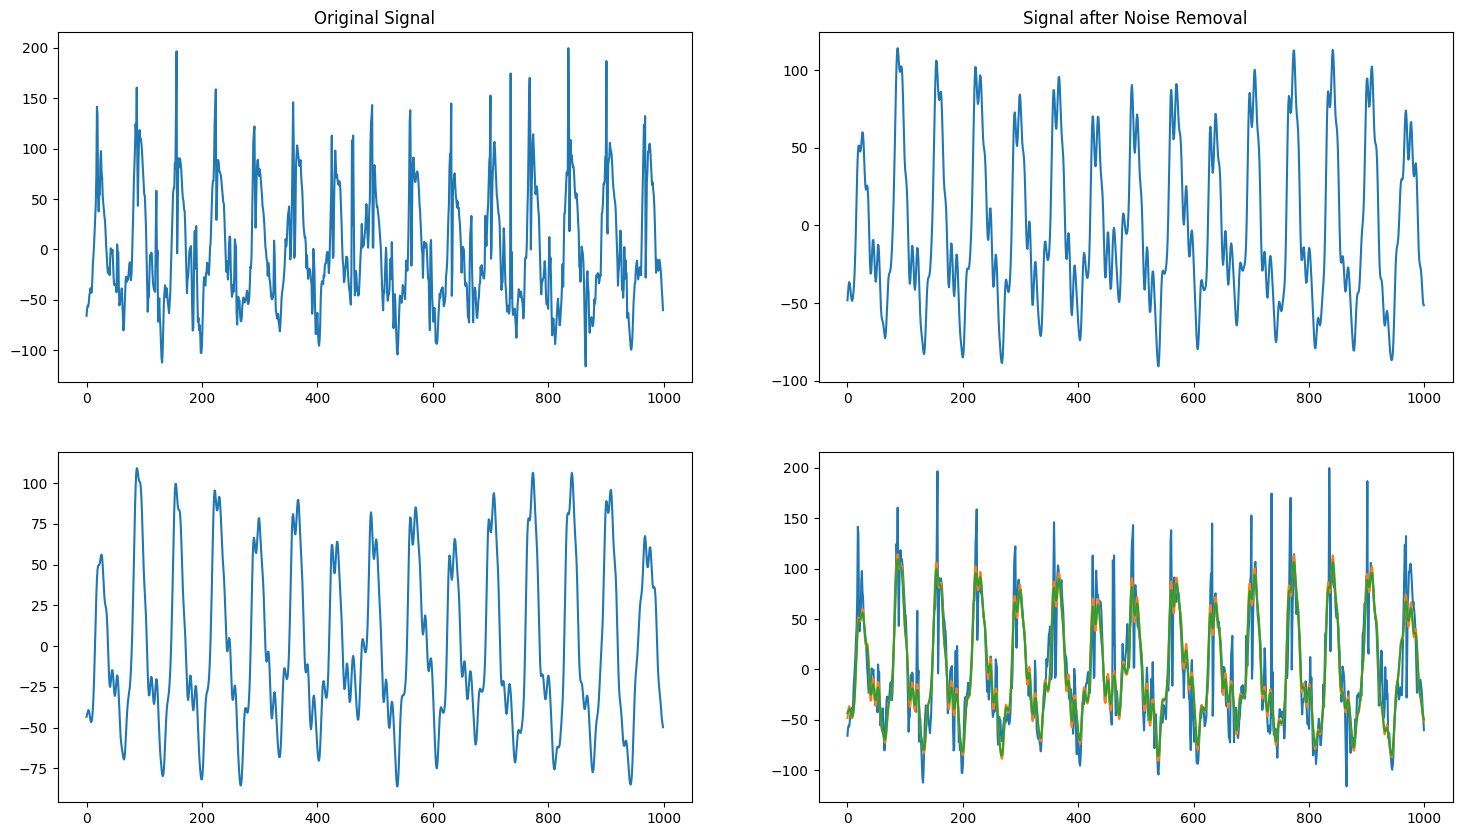

In [ ]:
# 仮のデータ生成（例として）
t = np.linspace(0, 1, 10000)

# FFTを適用
wy_fft = np.fft.fft(wy)
frequencies = np.fft.fftfreq(wy.size, d=t[1]-t[0])

# ノイズを除去（例として、特定の周波数成分をゼロセット）
# ここでは、ノイズ除去の方法としてシンプルな例を示しますが、
# 実際にはノイズの特性に応じて適切なフィルタリングを行う必要があります。
noise_threshold = 0.1 * np.max(np.abs(wy_fft))
wy_fft_filtered = np.where(np.abs(wy_fft) < noise_threshold, 0, wy_fft)

# 逆FFTを適用
wy_clean = np.fft.ifft(wy_fft_filtered)

#
tau =5
wy_fft_MAM = LPF_MAM(wy_clean,tau)

# 結果をプロット
plt.figure(figsize=(18, 10))

# 元の信号
plt.subplot(2, 2, 1)
plt.plot(wy)
plt.title('Original Signal')

# ノイズ除去後の信号
plt.subplot(2, 2, 2)
plt.plot(wy_clean.real)  # ifftの結果は複素数なので、実部をプロット
plt.title('Signal after Noise Removal')

plt.subplot(2,2,3)
plt.plot(wy_fft_MAM)


plt.subplot(2,2,4)
plt.plot(wy)
plt.plot(wy_clean.real)
plt.plot(wy_fft_MAM)

plt.show()
